In [1]:
dominant_type_data = []
path = "V3top_dominant_type_data_processed_frompeople.tsv"
with open(path) as dominant_type_data_file: 
    for record in dominant_type_data_file.readlines():
        dominant_type_data.append(record.strip().split("\t"))

In [2]:
print(len(dominant_type_data))
dominant_type_data_clean = []
entries_greater_than_five = 0
for record in dominant_type_data:
    if len(record) >= 3:
        entries_greater_than_five += 1
        dominant_type_data_clean.append(record)
    #else:
    #    print(record)
print(entries_greater_than_five)

5509800
3645027


In [3]:
all_dominant_types = set()
sid_data = {}
for record in dominant_type_data_clean:
    if record[0] in sid_data:
        sid_data[record[0]].append(record)
    else:
        sid_data[record[0]] = [record]
    all_dominant_types.add(record[0])
print(len(all_dominant_types))


2071246


In [4]:
sid_data_entries = []
for sid in sid_data:
    sid_data_entries.append(len(sid_data[sid]))

In [5]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(sid_data_entries) 
plt.hist(a, bins = [counter for counter in range(30)]) 
plt.title("histogram") 
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
printed_ones = False
for sid in sid_data:
    if len(sid_data[sid]) == 5:
        if not printed_ones:
            for records in sid_data[sid]:
                print(records[1:3])
            printed_ones = True



['"Drummer for the band Superchunk and The Mountain Goats who has also worked as a comedian on The Best Show on WFMU."^^mso:text@en', 'mso/music.artist']
['"Hey, t-shirt, leave those kids alone!"^^mso:text@en', 'mso/music.artist']
['"Jon Wurster is an actor and writer, known for Ant-Man and the Wasp (2018), Yes Man (2008) and Monk (2002)."^^mso:text@en', 'mso/music.artist']
['"Jonathan Patrick "Jon" Wurster is an American musician and humorist best known as the drummer for indie rockers Superchunk and The Mountain Goats, as well for his comedic work with radio host Tom Scharpling on the The Best Show on WFMU. Wurster has recorded and/or performed live with artists such as Bob Mould, Jay Farrar, Ben Gibbard, Robert Pollard, Katy Perry, The New Pornographers, Rocket from the Crypt, Ryan Adams, R.E.M., Guided by Voices, Marah, Alejandro Escovedo, A.C. Newman, Chris Stamey and Peter Holsapple, Inspiral Carpets, The Minus 5, and Charlie Daniels."^^mso:text@en', 'mso/music.artist']
['"Jonath

In [7]:
sid_data_top_10_desc = {}
for sid in sid_data:
    if len(sid_data[sid]) <= 10:
        sid_data_top_10_desc[sid] = sid_data[sid]

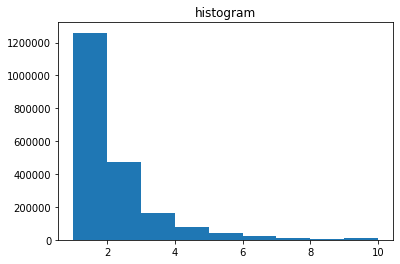

In [8]:
sid_data_top_10_desc_entries = []
for sid in sid_data_top_10_desc:
    sid_data_top_10_desc_entries.append(len(sid_data_top_10_desc[sid]))
    
a = np.array(sid_data_top_10_desc_entries) 
plt.hist(a, bins = [counter for counter in range(1,11)]) 
plt.title("histogram") 
plt.show()

In [9]:
import re
def get_content_label(sid_content_dominanttype):
    content = ""
    label = ""
    sid = ""
    for record in sid_content_dominanttype:
        record_fields = record
        if sid == "":
            sid = record_fields[0]
            record_fields[1] = re.sub(r"\^\^.*", "", record_fields[1])  
            record_fields[1] = re.sub(r"\"", "", record_fields[1])
            content = record_fields[1] + " "
            label = record_fields[2]
        if sid != "":
            assert sid == record_fields[0]
            #assert label == record_fields[2]
            if label != record_fields[2]:
                print("More than one label for : ", sid, " ", record_fields[2])
                return None
            record_fields[1] = re.sub(r"\^\^.*", "", record_fields[1]) 
            record_fields[1] = re.sub(r"\"", "", record_fields[1]) 
            content += record_fields[1] + " "
    content = content.strip()
    if content == "":
        return None
    return [content,label]
            
    

In [10]:
sid_concatenate_data = {}
for sid in sid_data_top_10_desc:
    data = get_content_label(sid_data_top_10_desc[sid])
    if data:
        sid_concatenate_data[sid] = data

More than one label for :  02c61da8-2b76-d2d0-0317-b996c85458dd   mso/music.group
More than one label for :  0506836c-f897-5715-d472-3f58abd4378e   mso/film.director
More than one label for :  06b7aafc-9ad7-af0b-3809-81701a410ecd   mso/tv.producer
More than one label for :  04cb5846-76d4-cf8a-e3d4-faa7f677b30c   mso/government.politician
More than one label for :  0ce7a5a8-bca2-a0c7-fe5a-98314af72cd1   mso/film.actor
More than one label for :  116e4f14-5e75-460e-9b15-e2f9f3acf684   mso/people.person
More than one label for :  178f924e-c66d-3234-8642-78c77a5d8533   mso/people.person
More than one label for :  0ff60124-7b5b-4fd5-9a40-a416ef29c4f8   mso/award.winner
More than one label for :  0e638e04-b0a5-3d7f-2366-49c995ba8360   mso/music.group
More than one label for :  1a815646-7ee2-1d68-b0b7-eae7d59c5852   mso/people.person
More than one label for :  1c2d8d82-974e-0751-14da-fe81515a1fec   mso/film.director
More than one label for :  1681a88d-0df5-b549-771f-ec48d22c2ee9   mso/film.sto

More than one label for :  42ea88e0-03c7-41d3-9386-2b8a40557df1   mso/film.writer
More than one label for :  4d46b804-9af9-7872-c897-3e0e40f52995   mso/award.nominee
More than one label for :  4c39261b-77d0-b2e5-f8b2-b1ff54b763da   mso/film.actor
More than one label for :  3324ae7d-2950-faa1-49e2-93c6e445e4a6   mso/people.person
More than one label for :  3d387bf0-cdad-4659-bfd2-646589c23cb9   mso/education.academic
More than one label for :  3626c390-2245-412d-9313-c7f8ed9d6236   mso/sports.pro_athlete
More than one label for :  30e51052-fee3-7550-9d61-1b4525fc83a3   mso/award.winner
More than one label for :  4d2d4825-15d5-8476-2b12-3faf486f68d1   mso/people.person
More than one label for :  3f4940f4-e39d-6aac-faeb-4956b556adb9   mso/film.story_contributor
More than one label for :  482a1aa4-6a4f-4d0e-959c-12bcbe2e2c6c   mso/music.composer
More than one label for :  57c86b08-0d90-615a-d548-dc1d88e9da93   mso/sports.pro_athlete
More than one label for :  07b26658-9f35-5152-a18c-b9a4b4

More than one label for :  21e526f5-066d-41e8-a77b-00c28c1a3d7a   mso/people.person
More than one label for :  3b324a0c-da03-a0b1-989e-3bb7ee5f4ec8   mso/music.group
More than one label for :  2b014058-71ce-370b-54f6-79ec0078e35f   mso/soccer.player
More than one label for :  2c44859e-2e0f-09a4-42e0-ce55880e13cf   mso/film.character
More than one label for :  29426faf-3a3a-4929-b148-ce46961f4fcb   mso/business.board_member
More than one label for :  1ff9a4fe-910d-3448-6da8-558665bd0945   mso/music.group
More than one label for :  3e1af2ce-77ba-4c5a-77e5-83b66e187c6a   mso/music.group
More than one label for :  17067996-17af-94db-7146-eda6e4f3fefe   mso/film.crewmember
More than one label for :  30f4b399-1943-59bf-62ae-e0117795b1c1   mso/film.actor
More than one label for :  3db23ff5-1e2d-e0b9-036b-625ef3d090b3   mso/people.person
More than one label for :  45a5494d-f212-4241-8a63-cfca063de7e5   mso/theater.production_staff
More than one label for :  31ac2763-d8e5-41b5-9d3a-4c565ceb90d8

More than one label for :  a08ecb17-966c-b3c2-ae55-df6086ceb4cb   mso/people.person
More than one label for :  b072bf72-b7b3-42fa-9fee-1f73aa6118c6   mso/sports.pro_athlete
More than one label for :  a0ece82d-23cd-6e39-9c0f-a60e7defe00d   mso/royalty.noble_person
More than one label for :  5b35a23d-1824-473b-536c-4021c21d416b   mso/government.politician
More than one label for :  66c55fb5-fec3-a310-e640-43a70fc61243   mso/cricket.player
More than one label for :  61c6b9fa-845f-ba75-4b1d-19b693fe7dfc   mso/film.writer
More than one label for :  6e324537-a311-ba43-dc4c-026305abb924   mso/music.artist
More than one label for :  7a4a76d1-d4fe-4175-b157-5cb38c2aad61   mso/people.person
More than one label for :  750bfd9c-096a-48c2-8310-a67c88e05f51   mso/music.group
More than one label for :  6c8f20d1-bf5a-1c2c-b879-d1e3b62b2acc   mso/film.writer
More than one label for :  88cf467b-4a82-400c-9675-d54cfa7bc0b4   mso/people.person
More than one label for :  9273e323-110c-8d66-d3e2-f8b405fabc6

More than one label for :  6fac6a14-d8b5-b87c-1a2c-8898dbfe54a7   mso/film.story_contributor
More than one label for :  64d57638-1664-9b49-fae5-898ee4c48ef3   mso/film.producer
More than one label for :  5cf89c06-6582-4fd6-8b7e-3ad633ccb3b4   mso/baseball.player
More than one label for :  66ae4a9f-d127-44e9-b36c-3d935e3d4c09   mso/music.group
More than one label for :  7de35eaa-61d2-f125-1b23-cc4d361708e5   mso/film.actor
More than one label for :  7a25221c-65b6-bad4-e810-96236786b8e6   mso/film.actor
More than one label for :  85593fda-a57a-492a-e367-feb6a0c6fd1d   mso/film.crewmember
More than one label for :  74b7209b-1f8c-8beb-1792-591dada82433   mso/film.music_contributor
More than one label for :  6b2920a9-8ccf-a728-d7cf-be7640cbbc8d   mso/film.actor
More than one label for :  7b5d9ca7-26df-3a69-04cf-6acdbd14d487   mso/people.person
More than one label for :  720f6a5a-0727-bf4e-950c-8060a7b56bad   mso/organization.organization
More than one label for :  8e64f333-76bb-e1a3-a58e-41

More than one label for :  94995741-f1d9-753a-1be8-31fd6872c018   mso/tv.producer
More than one label for :  68812010-9a97-4937-8d8c-f151f772d283   mso/music.group
More than one label for :  a2adb564-d80f-66a4-e28e-5fa4f58fc29b   mso/sports.pro_athlete
More than one label for :  6cebf2ab-4eb4-c70a-3f38-081ee767c1fc   mso/film.crewmember
More than one label for :  825fb4bb-4f35-72df-1b1e-a8a0e32dba45   mso/sports.pro_athlete
More than one label for :  6ab39f6d-1e29-46db-a084-4377220d4ac0   mso/people.person
More than one label for :  6f34774b-35fb-89f4-8eaf-e53bbcc3ee81   mso/tv.director
More than one label for :  8fc60537-3d60-4bd1-bbcb-a1937e658896   mso/film.writer
More than one label for :  67d134ec-1e19-685e-bd56-0a36fbcb9637   mso/tv.writer
More than one label for :  820f3f10-8569-4673-ae5b-56ad170adc38   mso/film.actor
More than one label for :  6863ac15-fd93-08fe-cd20-fed19ad61701   mso/people.person
More than one label for :  6e0d43ff-2a89-4924-9b65-8ec621a2b9c9   mso/people.pe

More than one label for :  c4a1c005-372d-7570-1851-e7c02b62fe28   mso/tv.producer
More than one label for :  cecb2ac9-d000-425a-82d7-9d68f3e113d8   mso/film.director
More than one label for :  c368a2db-bbc0-16e7-ceca-0397a83e352d   mso/film.crewmember
More than one label for :  df57bfe5-5367-bdc4-4be1-0add756cfb1b   mso/people.person
More than one label for :  dcceae0d-43b5-47be-8551-f16595813dd7   mso/tv.actor
More than one label for :  dabdede0-9319-e0b2-46a2-22b3e2527c8a   mso/music.artist
More than one label for :  ddb9216c-5e71-e0fa-9a88-3be9d8bd5c76   mso/people.person
More than one label for :  eff83286-19f8-bf4d-3f00-8515e3219125   mso/sports.golfer
More than one label for :  f068a2e2-50b2-47dc-8648-c4e0d3a871a9   mso/music.artist
More than one label for :  c69d1212-77bf-b772-d268-433c3da7a5b2   mso/sports.pro_athlete
More than one label for :  dc9b5b86-9667-0208-fb33-3c06e2d40955   mso/music.group
More than one label for :  ee57c165-6513-487e-9b85-d8372c7aacfe   mso/music.grou

More than one label for :  e91e2e9e-7811-b6c8-54ad-40f868c17387   mso/tv.actor
More than one label for :  e515f956-2c07-1cdc-797f-1a017a10f3d2   mso/people.person
More than one label for :  e1df40d3-2e62-3228-37da-a1c999d105da   mso/book.author
More than one label for :  d4d765d2-11a5-983e-23c5-8476965b7779   mso/visual_art.visual_artist
More than one label for :  ef9986b9-4d64-eee6-f808-1c3dea893108   mso/people.person
More than one label for :  ef961609-4058-a243-7727-e31ea69d01cf   mso/film.story_contributor
More than one label for :  dcab3293-33fd-1851-8c8d-084743ff3f6d   mso/people.person
More than one label for :  eec00d02-9644-a5e6-c252-4be518c79f7a   mso/sports.pro_athlete
More than one label for :  c873dea5-4fe2-8480-9bf7-635129a41a02   mso/people.person
More than one label for :  f5615030-977c-72d8-0767-8d66ea28f511   mso/visual_art.visual_artist
More than one label for :  f1df7fa1-53ad-af94-2c1f-867337575511   mso/people.deceased_person
More than one label for :  f0d450f2-7d

In [11]:
print(len(sid_data_top_10_desc))
print(len(sid_concatenate_data))

2065654
2051899


In [12]:
def print_one_entry(in_data):
    printed_ones = False
    for sid in in_data:
        if not printed_ones:
            for records in in_data[sid]:
                print(records)
                printed_ones = True

In [13]:
#print_one_entry(sid_concatenate_data)
sid_with_domtype = {}
records_with_domtype = 0
for sid in sid_concatenate_data:
    if (len(sid_concatenate_data[sid]) == 2) and (sid_concatenate_data[sid][1] != ""):
        sid_with_domtype[sid] = sid_concatenate_data[sid]
        records_with_domtype += 1
print("Total records : ",len(sid_concatenate_data))
print("Records with domtype : ",records_with_domtype)
print("Records with domtype : ",len(sid_with_domtype))


Total records :  2051899
Records with domtype :  907577
Records with domtype :  907577


In [14]:
#Lets calculate the total dom_types and counts
domtype_frequency = {}
for sid in sid_with_domtype:
    if sid_with_domtype[sid][1] in domtype_frequency:
        domtype_frequency[sid_with_domtype[sid][1]] += 1
    else:
        domtype_frequency[sid_with_domtype[sid][1]] = 1

In [15]:
for actor in domtype_frequency:
    print(actor, "\t", domtype_frequency[actor])

mso/people.person 	 150973
mso/sports.pro_athlete 	 22519
mso/government.politician 	 44569
mso/people.deceased_person 	 56328
mso/music.artist 	 68983
mso/book.author 	 60121
mso/film.actor 	 142790
mso/media_common.actor 	 96073
mso/visual_art.visual_artist 	 11393
mso/business.board_member 	 7170
mso/music.guitarist 	 118
mso/american_football.coach 	 1155
mso/basketball.player 	 6486
mso/soccer.player 	 26967
mso/baseball.player 	 14910
mso/royalty.noble_person 	 6657
mso/tv.actor 	 14772
mso/film.director 	 14107
mso/military.person 	 12008
mso/sports.athlete 	 4144
mso/ice_hockey.player 	 4800
mso/music.producer 	 156
mso/american_football.player 	 19960
mso/geography.mountaineer 	 344
mso/education.academic 	 9386
mso/boxing.boxer 	 2869
mso/music.composer 	 6145
mso/tv.personality 	 3510
mso/award.winner 	 7004
mso/olympics.athlete 	 9714
mso/sports.australian_rules_footballer 	 932
mso/cricket.bowler 	 1590
mso/law.inventor 	 1187
mso/organization.founder 	 5078
mso/award.hall

In [16]:
counter = 0
for sid in sid_with_domtype:
    if sid_with_domtype[sid][1] == "mso/military.person":
        counter += 1
        if counter <17:
            print(sid_with_domtype[sid])

["Admiral of the Fleet Sir Frederick Charles Doveton Sturdee, 1st Baronet GCB, KCMG, CVO (9 June 1859 – 7 May 1925) was a Royal Navy officer. After training as a torpedo officer, he commanded two different cruisers and then three different battleships before becoming commander of the 1st Battle Squadron of the Home Fleet. He went on to command the 3rd Cruiser Squadron and then the 2nd Cruiser Squadron. Admiral of the Fleet Sir Frederick Charles Doveton Sturdee, 1st Baronet GCB, KCMG, CVO (9 June 1859 – 7 May 1925) was a Royal Navy officer. After training as a torpedo officer, he commanded two different cruisers and then three different battleships before becoming commander of the 1st Battle Squadron of the Home Fleet. He went on to command the 3rd Cruiser Squadron and then the 2nd Cruiser Squadron. Admiral of the Fleet Sir Frederick Charles Doveton Sturdee, 1st Baronet, GCB, KCMG, CVO was a Royal Navy officer. After training as a torpedo officer, he commanded two different cruisers and

In [17]:
# Lets use mso/film.actor as actor and mso/music.artist, mso/book.author, mso/government.politician, 
# mso/soccer.player, mso/sports.pro_athlete, mso/film.director, mso/military.person as notactor

positive_records = []
# Lets take postive data
postive_counter = 0
for sid in sid_with_domtype:
    if sid_with_domtype[sid][1] == "mso/film.actor":
        postive_counter += 1
        if postive_counter <= 10000:
            positive_records.append([sid,sid_with_domtype[sid][0],sid_with_domtype[sid][1]])

In [18]:
negative_records = []
negative_list = ["mso/music.artist", "mso/book.author", "mso/government.politician"]
                 #"mso/soccer.player", "mso/sports.pro_athlete", "mso/film.director", "mso/military.person"] 
# Lets take postive data
negative_counter = 0
for sid in sid_with_domtype:
    if sid_with_domtype[sid][1] in negative_list:
        negative_counter += 1
        if negative_counter <= 30000:
            negative_records.append([sid,sid_with_domtype[sid][0],sid_with_domtype[sid][1]])


In [19]:
#Lets calculate the total dom_types and counts
negtype_frequency = {}
for record in negative_records:
    if record[2] in negtype_frequency:
        negtype_frequency[record[2]] += 1
    else:
        negtype_frequency[record[2]] = 1
print(negtype_frequency)

{'mso/government.politician': 7550, 'mso/music.artist': 12080, 'mso/book.author': 10370}


In [20]:
# Creating training data
total_data = []
for record in positive_records:
    record[2] = "0"
    total_data.append(record)
for record in negative_records:
    if record[2] == "mso/music.artist":
        record[2] = "1"
    elif record[2] == "mso/book.author":
        record[2] = "2"
    elif record[2] == "mso/government.politician":
        record[2] = "3" 
    total_data.append(record)

In [21]:
print(len(total_data))
print(total_data[0:5])

40000
[['000974b5-969a-0443-caae-fc639ce56022', 'Fred Inkley is an actor, known for P.S. I Love You (2007), Company (2011) and The Good Cop (2018). Fred Inkley is an actor, known for P.S. I Love You (2007), Company (2011) and The Good Cop (2018). Fred Inkley is an actor.', '0'], ['001c1360-7a7f-ee9c-e8b7-f7c8ef816140', "Simon Sotelo is an actor, known for The Men's Room (2012). Simon Sotelo is an actor, known for The Men's Room (2012). Simon Sotelo is an actor.", '0'], ['00062d3d-8ced-22e2-93a7-21b2bda4507d', 'Ross Thomas (born August 21, 1981) is an American actor, filmmaker, philanthropist and adventurer. Ross Thomas (born August 21, 1981) is an American actor, filmmaker, philanthropist and adventurer. Ross Thomas is a 38 year old American Actor. Born Ross Schuler Thomas on 21st August, 1981 in Stockton, California, USA, he is famous for Beyond the Break. His zodiac sign is Leo.#R##N##R##N#Ross Thomas has been in 3 on-screen matchups, including AnnaSophia Robb in Soul Surfer (2011), 

In [22]:
import random
random.shuffle(total_data)
for record in total_data[0:10]:
    print(record)
    print()

['214aa711-40f3-45d4-90d0-9b5764b603de', "American hip hop artist who has gained fame for his numerous albums and mixtapes including The Chuuwee Channel, Paradiso, Sabbath, Club 27, Commerce EP, and more. American hip hop artist who has gained fame for his numerous albums and mixtapes including The Chuuwee Channel, Paradiso, Sabbath, Club 27, Commerce EP, and more. Dionte Chuuwee Hunter is an American hip hop artist from Sacramento, California. Chuuwee has established a strong underground presence and is regularly featured on popular hip hop blogs and websites, such as 2DopeBoyz, HipHopDX, DJBooth, AllHipHop, and others. He also received a feature in XXL magazine. He was interviewed by Forbes at SXSW '12 as a rising artist. The record producers Chuuwee has worked with in the past include Cookin' Soul, Lee Bannon, Large Professor, as well as many others. He is currently signed to Amalgam Digital and has released four free mixtapes through the label. He recently released a collaboration 

In [23]:
with open("actorsArtistAuthorPolitician_training_data.tsv","w") as actors_file:
    for record in total_data:
        actors_file.write(record[2] + "\t" + record[1] + "\r\n")
actors_file.close()